    Model  n_block     lr  patience  Dice Coefficient
0    UNet        4  0.010        20             0.542
1    UNet        4  0.001        20             0.608
2    UNet        5  0.010        20             0.638
3    UNet        5  0.001        20             0.617
4    UNet        4  0.010        50             0.551
5    UNet        4  0.001        50             0.609
6    UNet        5  0.010        50             0.612
7    UNet        5  0.001        50             0.647
8   UNet#        4  0.010        20             0.682
9   UNet#        4  0.001        20             0.663
10  UNet#        5  0.010        20             0.740
11  UNet#        5  0.001        20             0.711
12  UNet#        4  0.010        50             0.672
13  UNet#        4  0.001        50             0.630
14  UNet#        5  0.010        50             0.540
15  UNet#        5  0.001        50             0.645


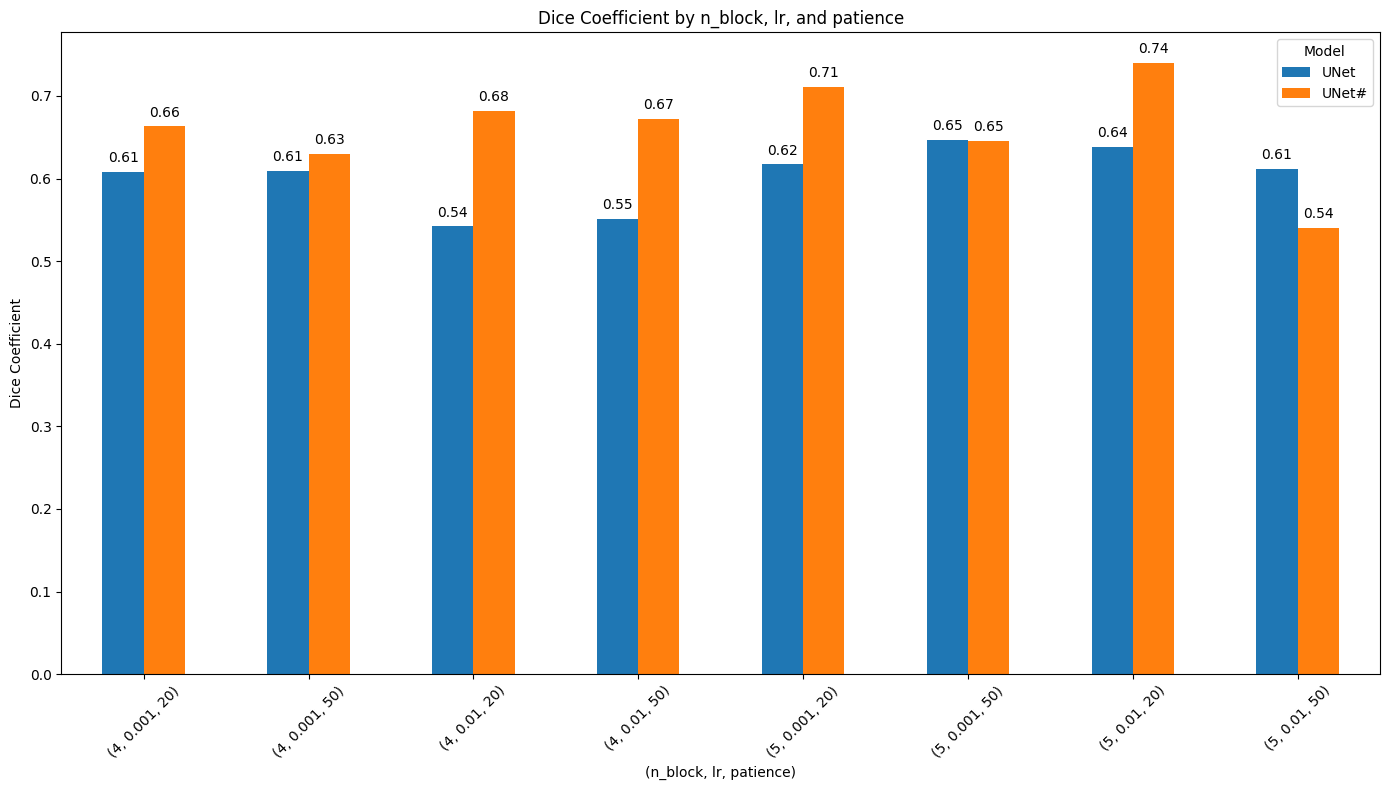

In [31]:
## plot of the dice coeff comparison of UNet and UNet# (fed with feature images)
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Revised sample data
data = {
    'Model': ['UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#'],
    'n_block': [4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5],
    'lr': [0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001],
    'patience': [20, 20, 20, 20, 50, 50, 50, 50, 20, 20, 20, 20, 50, 50, 50, 50 ],
    'Dice Coefficient': [0.542, 0.608, 0.638, 0.617, 0.551, 0.609, 0.612, 0.647, 0.682, 0.663, 0.740, 0.711, 0.672, 0.630, 0.540, 0.645]
}

df = pd.DataFrame(data)

print(df)


# Create a pivot table for better plotting
pivot_df = df.pivot_table(values='Dice Coefficient', index=['n_block', 'lr', 'patience'], columns='Model')

# Reset the index for plotting
pivot_df = pivot_df.reset_index()

# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Creating the plot
pivot_df.set_index(['n_block', 'lr', 'patience']).plot(kind='bar', ax=ax)

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customizing the plot
ax.set_title('Dice Coefficient by n_block, lr, and patience')
ax.set_xlabel('(n_block, lr, patience)')
ax.set_ylabel('Dice Coefficient')
plt.xticks(rotation=45)
ax.legend(title='Model')

plt.tight_layout()
plt.show()


In [19]:
### each label dice comparispon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os
import csv
from tabulate import tabulate

all_data = []
# Function to extract numeric part from folder name
def extract_number(folder_name):
    return int(folder_name.split('-')[-1])
# Get a list of folder names sorted by the numeric part
folder_names = sorted([folder_name for folder_name in os.listdir('result_test') if folder_name.startswith('20240704-Conv1x1')], key=extract_number)

# Loop through sorted folder names
for folder_name in folder_names:
    folder_path = os.path.join('result_test', folder_name)
    if os.path.isdir(folder_path):
        # Find CSV file in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('Dice.csv')]
        if len(csv_files) == 1:
            csv_file_path = os.path.join(folder_path, csv_files[0])
            # Read CSV file
            with open(csv_file_path, 'r') as file:
                reader = csv.reader(file)
                # Extract second number from the array
                for row in reader:
                    all_data.append(row[2:])                

all_data = np.array(all_data)
all_data = all_data.astype(float)
half_length = all_data.shape[0] // 2

print(tabulate(all_data))
#print(tabulate(all_data[:half_length]))
#print(tabulate(all_data[half_length:]))

first_half_mean = np.mean(all_data[:half_length], axis=0)
second_half_mean = np.mean(all_data[half_length:], axis=0)
mean_all = np.mean(all_data, axis=0) 

unet_sharp = first_half_mean.tolist()
unet = second_half_mean.tolist()

mean_all = mean_all.tolist()

print("UNet# dice:")
print(unet_sharp)
print("UNet dice:")
print(unet)

print("Overall mean:")
print(mean_all)

# Sample data (replace with your actual data)
objects = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10']



# Creating a DataFrame
df = pd.DataFrame({
    'Objects': objects,
    'UNet#': unet_sharp,
    'UNet': unet
})

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(df['Objects'], df['UNet#'], marker='o', label='UNet#', color = 'orange')
plt.plot(df['Objects'], df['UNet'], marker='o', label='UNet', color = 'blue')

plt.title('Dice Coefficient for Object Segmentation')
plt.xlabel('Objects')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


--------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------
0.879519  0.883469  0.747814  0.806799  0.742623  0.771045  0.746341  0.778301  0.787937  0.758876  0.790272
0.862318  0.88016   0.818233  0.903929  0.678802  0.775869  0.600183  0.684523  0.674318  0.728176  0.760651
0.814092  0.773969  0.83468   0.736498  0.779675  0.754176  0.589394  0.59547   0.545168  0.339913  0.676303
0.765459  0.813946  0.690822  0.747674  0.718668  0.650484  0.671143  0.647687  0.696896  0.546394  0.694917
0.80373   0.81862   0.755652  0.803591  0.743562  0.727815  0.737628  0.685196  0.745994  0.649111  0.74709
0.816667  0.82515   0.766005  0.794288  0.735575  0.676343  0.706211  0.702485  0.755102  0.729062  0.750689
0.910893  0.927413  0.867769  0.911872  0.767824  0.797526  0.69094   0.691495  0.621947  0.580537  0.776821
0.914451  0.934596  0.885029  0.87177   0.806964  0.748737  0.731434  0.811134  0.706487  0.801402  0.8212
0.899967  0.827914  0.

ValueError: All arrays must be of the same length